In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df1= pd.read_excel('/content/drive/MyDrive/ERTS.xlsx',sheet_name='Sheet2')
df2= pd.read_excel('/content/drive/MyDrive/ERTS-2.xlsx')

In [ ]:
common_cols={
    "request_dept":"Department",
    "request_category":"Sub-department",
    "request_subject":"Title",
    "request_description":"Description",
    "request_priority":"Priority"
}

In [ ]:
df2_renamed = df2.rename(columns=common_cols)

df2_aligned = df2_renamed.reindex(columns=df1.columns)

combined_df = pd.concat([df1, df2_aligned], ignore_index=True)

In [ ]:
remove_cols=['ID','location','Assigned To','Created by','Updated by','Created at','Status']

combined_df = combined_df.drop(columns=remove_cols)

In [ ]:
#combined_df.columns

In [ ]:
#null values
#combined_df.isnull().sum()

In [ ]:
#combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11340 entries, 0 to 11339
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Department             11340 non-null  object
 1   Sub-department         11340 non-null  object
 2   Title                  11340 non-null  object
 3   Description            11340 non-null  object
 4   Priority               11340 non-null  object
 5   title_processed        11340 non-null  object
 6   description_processed  11340 non-null  object
 7   text                   11340 non-null  object
dtypes: object(8)
memory usage: 708.9+ KB


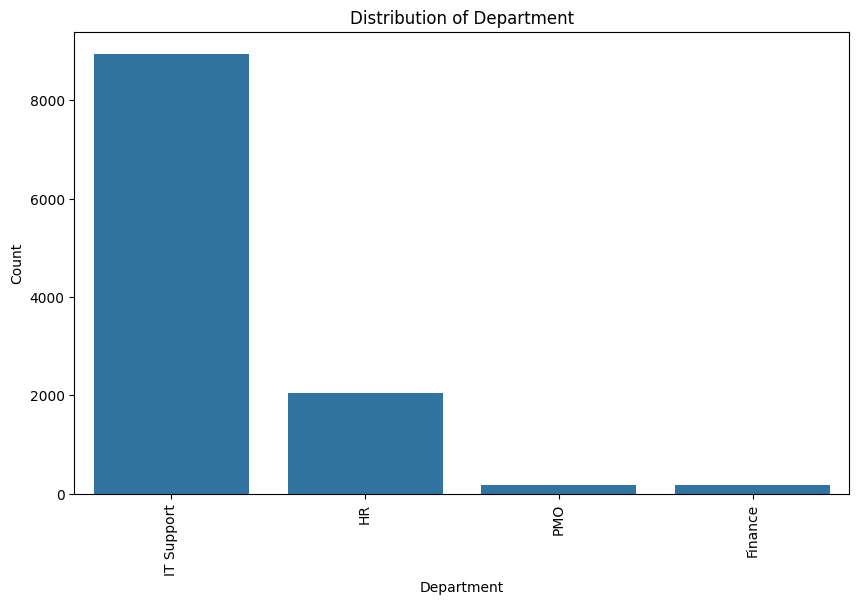

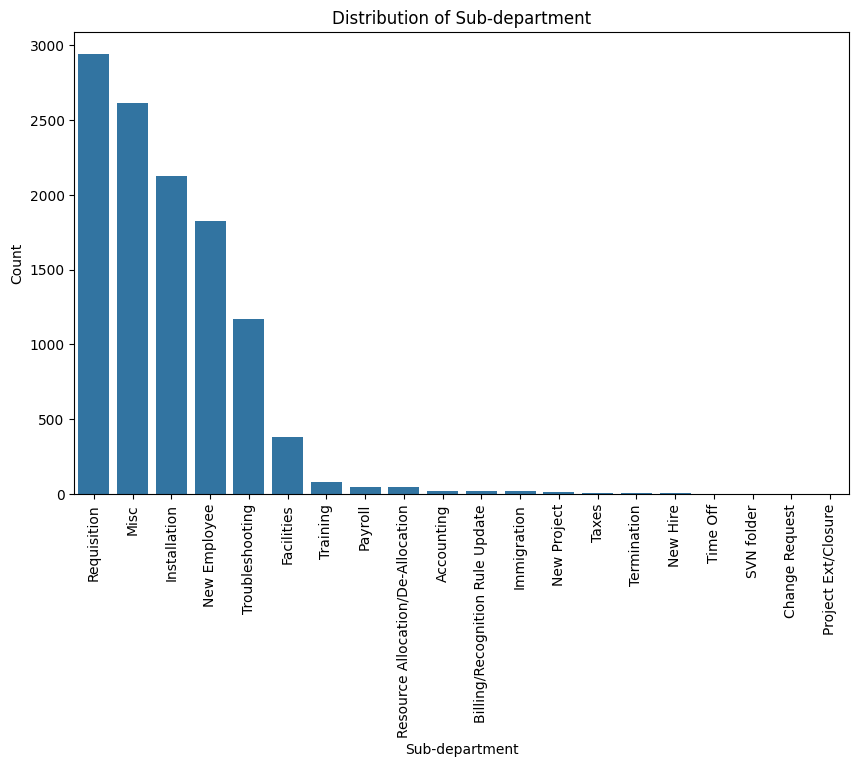

In [ ]:
'''import matplotlib.pyplot as plt
import seaborn as sns

def plot_category_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, order=df[column_name].value_counts().index)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

columns_to_plot = ['Department']

for column in columns_to_plot:
    plot_category_distribution(combined_df, column)'''


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    text = text.lower()

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    words = text.split()

    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return ' '.join(words)

combined_df['title_processed'] = combined_df['Title'].apply(preprocess_text)
combined_df['description_processed'] = combined_df['Description'].apply(preprocess_text)


In [ ]:
combined_df['text'] = combined_df['title_processed'] + ' ' + combined_df['description_processed']
print(combined_df)

       Department   Sub-department  \
0         Finance             Misc   
1         Finance       Accounting   
2         Finance          Payroll   
3         Finance             Misc   
4         Finance             Misc   
...           ...              ...   
11335  IT Support  Troubleshooting   
11336  IT Support     Installation   
11337  IT Support     New Employee   
11338  IT Support  Troubleshooting   
11339          HR       Facilities   

                                                   Title  \
0                          H1B Expenditure Reimbursement   
1                                    Bill for Team lunch   
2                                Password is not Working   
3                                         Salary Advance   
4                    Re: H1B Interview Expenses Approval   
...                                                  ...   
11335       unable to access java for oracle application   
11336                      Adobe Photoshop Trail Version   
113

**SMOTE**

In [ ]:
'''from imblearn.over_sampling import SMOTE
X = tfidf_vectorizer.fit_transform(combined_df['text'])
Y = combined_df['Department']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the downsampling and upsampling strategy
downsampler = RandomUnderSampler(sampling_strategy={'IT Support': 4000})
upsampler = SMOTE(sampling_strategy={'Finance': 4000, 'HR': 4000, 'PMO': 4000})

# Apply downsampling and then upsampling
X_train_downsampled, Y_train_downsampled = downsampler.fit_resample(X_train, Y_train)
X_train_resampled, Y_train_resampled = upsampler.fit_resample(X_train_downsampled, Y_train_downsampled)

from collections import Counter

print("Class distribution before SMOTE:", Counter(Y_train))

print("Class distribution after SMOTE:", Counter(Y_train_resampled))'''

Class distribution before SMOTE: Counter({'IT Support': 7154, 'HR': 1656, 'PMO': 131, 'Finance': 131})
Class distribution after SMOTE: Counter({'Finance': 4000, 'HR': 4000, 'IT Support': 4000, 'PMO': 4000})


**SMOTE + TF-IDF + Log_reg**

In [ ]:

'''log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resampled, Y_train_resampled)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred,average="weighted")
recall = recall_score(Y_test, y_pred,average="weighted")
f1 = f1_score(Y_test, y_pred,average="weighted")

print(f"Accuracy: {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 Score : {f1}")

print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()'''

'log_reg = LogisticRegression(max_iter=1000)\nlog_reg.fit(X_train_resampled, Y_train_resampled)\n\ny_pred = log_reg.predict(X_test)\n\naccuracy = accuracy_score(Y_test, y_pred)\nprecision = precision_score(Y_test, y_pred,average="weighted")\nrecall = recall_score(Y_test, y_pred,average="weighted")\nf1 = f1_score(Y_test, y_pred,average="weighted")\n\nprint(f"Accuracy: {accuracy}")\nprint(f"Precision : {precision}")\nprint(f"Recall : {recall}")\nprint(f"F1 Score : {f1}")\n\nprint("\nClassification Report:")\nprint(classification_report(Y_test, y_pred))\n\nconf_matrix = confusion_matrix(Y_test, y_pred)\nplt.figure(figsize=(10, 8))\nsns.heatmap(conf_matrix, annot=True, fmt=\'d\', cmap=\'Blues\', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)\nplt.xlabel(\'Predicted\')\nplt.ylabel(\'True\')\nplt.title(\'Confusion Matrix\')\nplt.show()'

In [ ]:
'''from sklearn.model_selection import cross_val_score

log_reg_scores = cross_val_score(log_reg, X_train_resampled, Y_train_resampled, cv=5, scoring='f1_weighted')
print(f"Logistic Regression F1 Score (Cross-Validation): {log_reg_scores.mean()}")'''

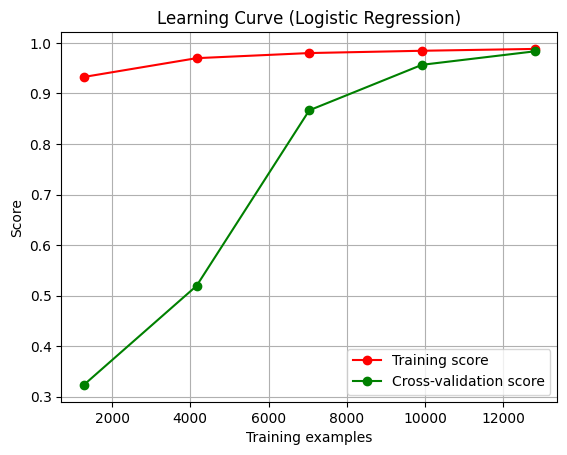

'\n# SVM\ntrain_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, Y_train, cv=5, scoring=\'f1_weighted\', n_jobs=-1)\ntrain_scores_mean = np.mean(train_scores, axis=1)\ntest_scores_mean = np.mean(test_scores, axis=1)\n\nplt.figure()\nplt.plot(train_sizes, train_scores_mean, \'o-\', color=\'r\', label="Training score")\nplt.plot(train_sizes, test_scores_mean, \'o-\', color=\'g\', label="Cross-validation score")\nplt.xlabel("Training examples")\nplt.ylabel("Score")\nplt.title("Learning Curve (SVM)")\nplt.legend(loc="best")\nplt.grid()\nplt.show()\n'

In [ ]:
'''from sklearn.model_selection import learning_curve
import numpy as np

# Logistic Regression
train_sizes, train_scores, test_scores = learning_curve(log_reg, X_train_resampled, Y_train_resampled, cv=5, scoring='f1_weighted', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Logistic Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

# SVM
train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, Y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (SVM)")
plt.legend(loc="best")
plt.grid()
plt.show()
'''

**BERT Tokenizer + BERT Model**

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
X = combined_df['text']
Y = combined_df['Department']

embeddings = [get_bert_embeddings(text) for text in X]
X_embeddings = np.vstack(embeddings)

In [ ]:
'''import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_cls_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return cls_embedding

X = combined_df['text']
Y = combined_df['Department']

embeddings = [get_bert_cls_embeddings(text) for text in X]
X_embeddings = np.vstack(embeddings)'''

In [ ]:
'''import joblib
joblib.dump(embedder, 'bert_embedder.pkl')'''

['bert_embedder.pkl']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_embeddings, Y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
def predict_department(text):
    embedding = get_bert_embeddings(text)
    prediction = log_reg.predict(embedding)
    return prediction

In [ ]:
y_pred = log_reg.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

     Finance       0.52      0.44      0.47        39
          HR       0.87      0.88      0.87       400
  IT Support       0.97      0.98      0.98      1787
         PMO       0.89      0.60      0.71        42

    accuracy                           0.95      2268
   macro avg       0.81      0.72      0.76      2268
weighted avg       0.94      0.95      0.94      2268



In [ ]:
text_example = "I want to cancel my leave request"
print(predict_department(text_example))

['IT Support']


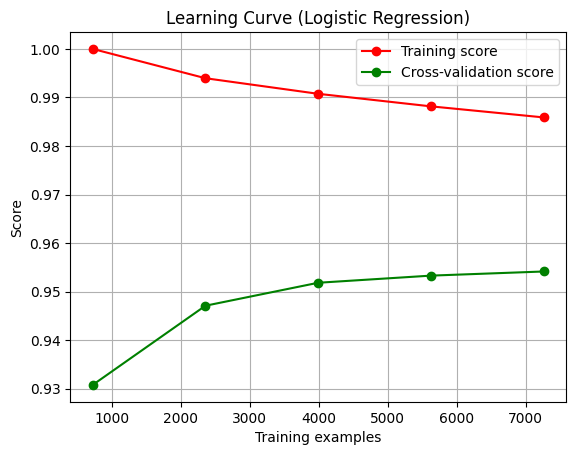

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(log_reg, X_train, Y_train, cv=5, scoring='f1_weighted')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Logistic Regression)")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
'''import joblib
joblib.dump(log_reg, 'log_reg.pkl')'''

['log_reg.pkl']

**BERT + SMOTE + Log_reg**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_embeddings, Y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

downsampler = RandomUnderSampler(sampling_strategy={'IT Support': 4000})
upsampler = SMOTE(sampling_strategy={'Finance': 4000, 'HR': 4000, 'PMO': 4000})

X_train_downsampled, Y_train_downsampled = downsampler.fit_resample(X_train, Y_train)
X_train_resampled, Y_train_resampled = upsampler.fit_resample(X_train_downsampled, Y_train_downsampled)

log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_resampled, Y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
def predict_department(text):
    embedding = get_bert_embeddings(text)
    prediction = log_reg_smote.predict(embedding)
    return prediction

In [ ]:
y_pred = log_reg_smote.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

     Finance       0.36      0.56      0.44        39
          HR       0.87      0.89      0.88       400
  IT Support       0.99      0.96      0.98      1787
         PMO       0.58      0.79      0.67        42

    accuracy                           0.94      2268
   macro avg       0.70      0.80      0.74      2268
weighted avg       0.95      0.94      0.94      2268



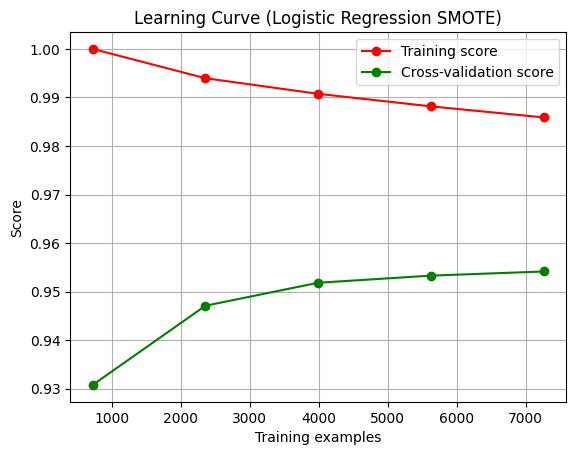

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(log_reg_smote, X_train, Y_train, cv=5, scoring='f1_weighted')
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve (Logistic Regression SMOTE)")
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
text_example = " I am unable to submit my timesheets to onescan"
print(predict_department(text_example))

['HR']


In [ ]:
'''import joblib
joblib.dump(log_reg_smote, 'log_reg_smote.pkl')'''

['log_reg_smote.pkl']

In [ ]:
text_example = "leave balance"
print(predict_department(text_example))

['IT Support']


In [ ]:
#joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [ ]:
'''import pickle
from transformers import BertTokenizer, BertModel

class BERTEmbedder:
    def __init__(self):
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        self.model = BertModel.from_pretrained('bert-base-uncased')

    def get_embeddings(self, text):
        inputs = self.tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=128)
        outputs = self.model(**inputs)
        embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
        return embeddings

# Create an instance of the class
embedder = BERTEmbedder()

# Serialize the class instance to a file
with open('bert_embedder.pkl', 'wb') as f:
    pickle.dump(embedder, f)'''


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

[[-2.48633698e-01 -2.37713009e-01 -2.74047814e-02 -4.42238301e-01
  -2.38960192e-01 -9.58736092e-02  6.14721954e-01  6.13903522e-01
  -3.30833852e-01  9.16898437e-03  4.71259430e-02 -4.14673507e-01
  -1.93259984e-01  3.79303455e-01  1.29124433e-01  2.28526726e-01
  -2.14505509e-01  4.94342856e-02 -3.79268378e-01  7.36111179e-02
   3.86960775e-01  1.62628040e-01 -3.85694295e-01 -6.42708465e-02
   8.68889809e-01 -2.72985786e-01 -8.37730840e-02 -5.36088765e-01
  -1.02116108e+00  1.71806008e-01  3.88002872e-01 -1.43502444e-01
  -1.23488046e-01 -1.21000059e-01 -1.05606206e-01 -4.68811423e-01
   1.41805142e-01 -4.27352004e-02  1.29988551e-01  4.28300053e-01
  -6.47845924e-01 -6.47663921e-02  6.46766067e-01  3.74741018e-01
   2.90839404e-01  2.44696140e-01  1.52436897e-01 -6.05641492e-02
  -1.95087641e-01  2.33658448e-01 -1.27231622e+00  1.94661066e-01
   4.85713035e-01  3.98667544e-01 -3.34685653e-01  1.16325893e-01
   1.48473844e-01 -8.41851652e-01 -4.96347100e-01 -6.66385666e-02
   6.73443

In [ ]:
from google.colab import files

# Download the bert_embedder.pkl file
files.download('bert_embedder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>